In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Configuración profesional de Matplotlib
plt.style.use('seaborn-v0_8')

mpl.rcParams.update({
    'font.size': 11,
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.grid': True,
    'grid.alpha': 0.3
})

print("Configuración de Matplotlib completada")

Configuración de Matplotlib completada


In [3]:
# Paleta de colores corporativa
colores = [
    '#1f77b4',  # Azul principal
    '#ff7f0e',  # Naranja
    '#2ca02c',  # Verde
    '#d62728',  # Rojo
    '#9467bd',  # Morado
    '#8c564b'   # Marrón
]

print("Paleta corporativa definida")

Paleta corporativa definida


In [4]:
# Generar dataset de ventas empresariales
np.random.seed(42)
n_ventas = 1000

df = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_ventas, freq='D'),
    'producto': np.random.choice(
        ['Producto A', 'Producto B', 'Producto C', 'Producto D'], 
        n_ventas
    ),
    'region': np.random.choice(
        ['Norte', 'Sur', 'Este', 'Oeste'], 
        n_ventas
    ),
    'cantidad': np.random.randint(1, 20, n_ventas),
    'precio_unitario': np.random.uniform(50, 500, n_ventas).round(2),
    'cliente_tipo': np.random.choice(
        ['Regular', 'Premium', 'VIP'], 
        n_ventas, 
        p=[0.6, 0.3, 0.1]
    )
})

print(f"Dataset creado: {len(df)} registros")
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")

Dataset creado: 1000 registros
Período: 2024-01-01 00:00:00 a 2026-09-26 00:00:00


In [5]:
# Calcular métricas derivadas
df['total_venta'] = df['cantidad'] * df['precio_unitario']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

print(f"Total ventas: ${df['total_venta'].sum():,.2f}")

Total ventas: $2,777,508.39


In [6]:
# Vista general del dataset
display(df.head())

print("\nInformación del dataset:")
df.info()

print("\nResumen estadístico:")
display(df.describe())

,fecha,producto,region,cantidad,precio_unitario,cliente_tipo,total_venta,mes,dia_semana
0,2024-01-01,Producto C,Sur,15,195.00,Regular,2925.00,1,Monday
1,2024-01-02,Producto D,Este,12,106.36,Regular,1276.32,1,Tuesday
2,2024-01-03,Producto A,Norte,16,263.45,Regular,4215.20,1,Wednesday
3,2024-01-04,Producto C,Norte,19,101.28,Premium,1924.32,1,Thursday
4,2024-01-05,Producto C,Norte,8,268.71,Regular,2149.68,1,Friday



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1000 non-null   datetime64[ns]
 1   producto         1000 non-null   object        
 2   region           1000 non-null   object        
 3   cantidad         1000 non-null   int32         
 4   precio_unitario  1000 non-null   float64       
 5   cliente_tipo     1000 non-null   object        
 6   total_venta      1000 non-null   float64       
 7   mes              1000 non-null   int32         
 8   dia_semana       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 62.6+ KB

Resumen estadístico:


,fecha,cantidad,precio_unitario,total_venta,mes
count,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2025-05-14 12:00:00,9.926000,277.666840,2777.508390,6.100000
min,2024-01-01 00:00:00,1.000000,50.080000,50.950000,1.000000
25%,2024-09-06 18:00:00,5.000000,159.712500,973.125000,3.000000
50%,2025-05-14 12:00:00,10.000000,286.725000,2158.170000,6.000000
75%,2026-01-19 06:00:00,15.000000,389.765000,4158.270000,9.000000
max,2026-09-26 00:00:00,19.000000,499.870000,9307.150000,12.000000
std,NaN,5.446484,131.001999,2161.748009,3.307407


In [7]:
# Calcular métricas derivadas
df['total_venta'] = df['cantidad'] * df['precio_unitario']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

print(f"Dataset creado: {len(df)} registros")
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Total ventas: ${df['total_venta'].sum():,.2f}")

Dataset creado: 1000 registros
Período: 2024-01-01 00:00:00 a 2026-09-26 00:00:00
Total ventas: $2,777,508.39


Text(0.5, 0.98, 'Análisis Univariado de Ventas Empresariales')

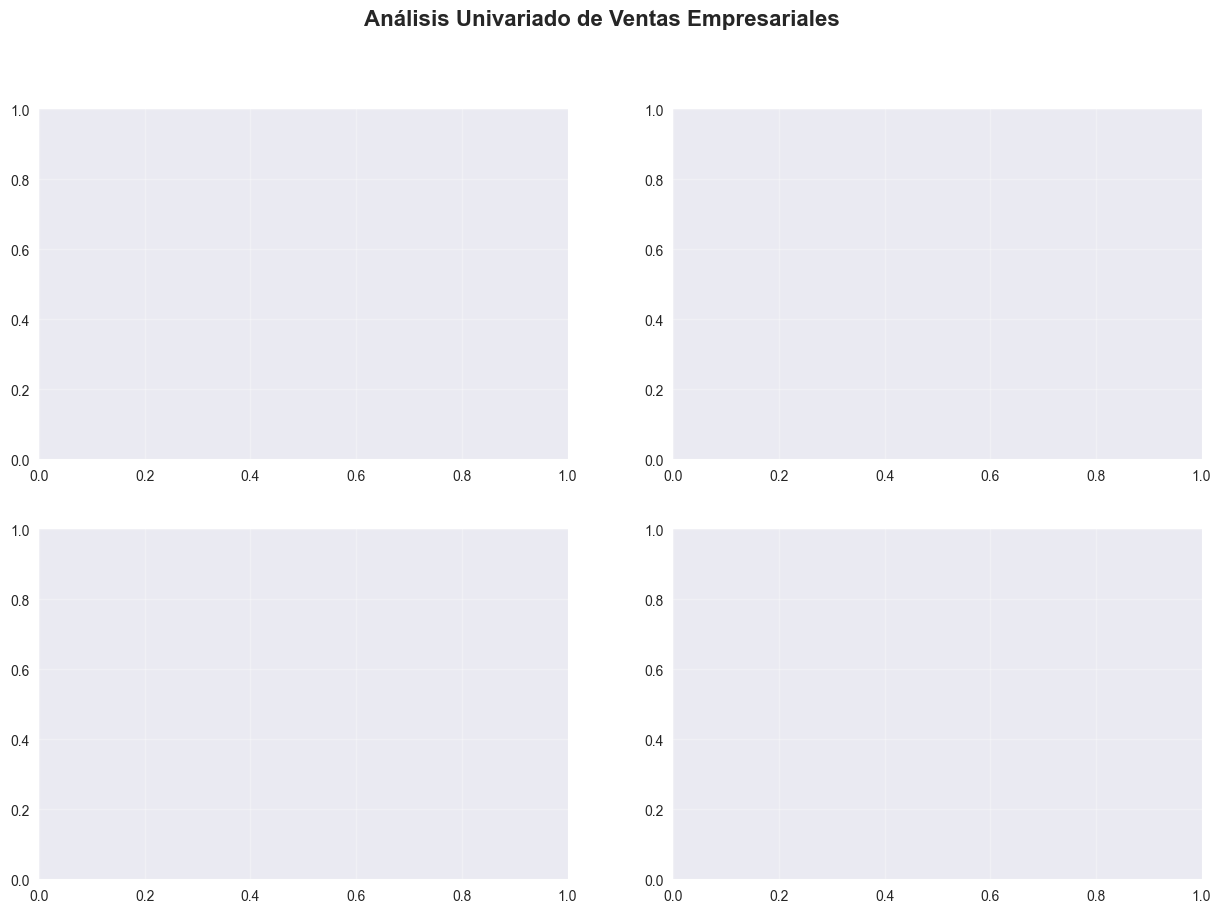

In [14]:
# Figura con múltiples análisis univariados
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(
    'Análisis Univariado de Ventas Empresariales', 
    fontsize=16, 
    fontweight='bold'
)

In [9]:
# 1. Histograma de total de ventas
ax1.hist(
    df['total_venta'], 
    bins=50, 
    alpha=0.7, 
    color=colores[0], 
    edgecolor='black'
)

ax1.set_title('Distribución de Total de Ventas')
ax1.set_xlabel('Total Venta ($)')
ax1.set_ylabel('Frecuencia')

ax1.axvline(
    df['total_venta'].mean(), 
    color=colores[3], 
    linestyle='--', 
    label=f"Media: ${df['total_venta'].mean():.0f}"
)

ax1.legend()

In [10]:
# 2. Box plot por producto
productos = df.groupby('producto')['total_venta'].apply(list)

bp = ax2.boxplot(
    productos.values, 
    labels=productos.index, 
    patch_artist=True
)

for patch in bp['boxes']:
    patch.set_facecolor(colores[1])
    patch.set_alpha(0.7)

ax2.set_title('Distribución por Producto')
ax2.set_ylabel('Total Venta ($)')
ax2.tick_params(axis='x', rotation=45)

C:\Users\vylo0\AppData\Local\Temp\ipykernel_18884\3721606015.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(


In [11]:
# 3. Gráfico de barras por región
ventas_region = (
    df.groupby('region')['total_venta']
      .sum()
      .sort_values(ascending=True)
)

bars = ax3.barh(
    ventas_region.index, 
    ventas_region.values, 
    color=colores[2], 
    alpha=0.7
)

ax3.set_title('Ventas Totales por Región')
ax3.set_xlabel('Ventas Totales ($)')

for i, (region, venta) in enumerate(zip(ventas_region.index, ventas_region.values)):
    ax3.text(
        venta + 1000, 
        i, 
        f'${venta:,.0f}', 
        va='center', 
        fontweight='bold'
    )

In [12]:
# 4. Pie chart de tipos de cliente (con precaución)
cliente_counts = df['cliente_tipo'].value_counts()

ax4.pie(
    cliente_counts.values, 
    labels=cliente_counts.index, 
    autopct='%1.1f%%', 
    colors=colores[:3], 
    startangle=90
)

ax4.set_title('Distribución de Tipos de Cliente')

Text(0.5, 1.0, 'Distribución de Tipos de Cliente')

In [13]:
#5. Guardar evidencia
plt.tight_layout()
plt.savefig(
    'analisis_univariado_empresarial.png', 
    dpi=300, 
    bbox_inches='tight'
)

print("Análisis univariado guardado como 'analisis_univariado_empresarial.png'")
plt.show()

Análisis univariado guardado como 'analisis_univariado_empresarial.png'


<Figure size 1000x600 with 0 Axes>

C:\Users\vylo0\AppData\Local\Temp\ipykernel_18884\3476246987.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(productos.values, labels=productos.index, patch_artist=True)


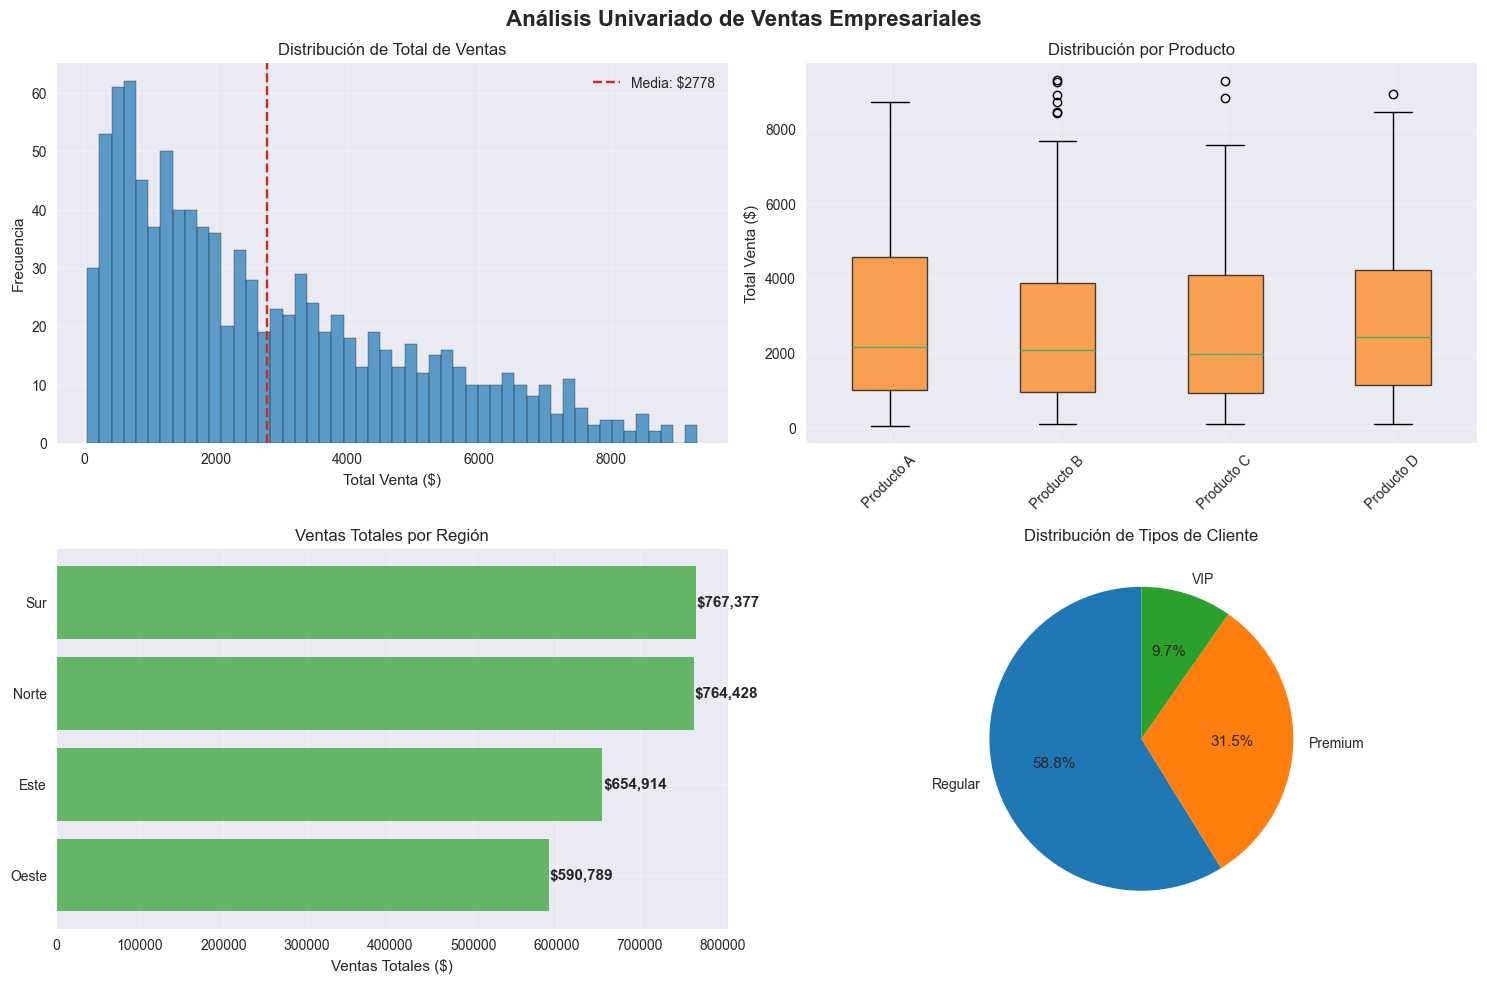

Análisis univariado guardado correctamente


In [15]:
# Figura con múltiples análisis univariados
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis Univariado de Ventas Empresariales', fontsize=16, fontweight='bold')

# 1. Histograma
ax1.hist(df['total_venta'], bins=50, alpha=0.7, color=colores[0], edgecolor='black')
ax1.set_title('Distribución de Total de Ventas')
ax1.set_xlabel('Total Venta ($)')
ax1.set_ylabel('Frecuencia')
ax1.axvline(df['total_venta'].mean(), color=colores[3], linestyle='--',
            label=f"Media: ${df['total_venta'].mean():.0f}")
ax1.legend()

# 2. Boxplot por producto
productos = df.groupby('producto')['total_venta'].apply(list)
bp = ax2.boxplot(productos.values, labels=productos.index, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor(colores[1])
    patch.set_alpha(0.7)
ax2.set_title('Distribución por Producto')
ax2.set_ylabel('Total Venta ($)')
ax2.tick_params(axis='x', rotation=45)

# 3. Ventas por región
ventas_region = df.groupby('region')['total_venta'].sum().sort_values()
ax3.barh(ventas_region.index, ventas_region.values, color=colores[2], alpha=0.7)
ax3.set_title('Ventas Totales por Región')
ax3.set_xlabel('Ventas Totales ($)')
for i, v in enumerate(ventas_region.values):
    ax3.text(v + 1000, i, f'${v:,.0f}', va='center', fontweight='bold')

# 4. Tipos de cliente
cliente_counts = df['cliente_tipo'].value_counts()
ax4.pie(cliente_counts.values, labels=cliente_counts.index,
        autopct='%1.1f%%', colors=colores[:3], startangle=90)
ax4.set_title('Distribución de Tipos de Cliente')

# Guardar y mostrar
plt.tight_layout()
plt.savefig('analisis_univariado_empresarial.png', dpi=300, bbox_inches='tight')
plt.show()

print("Análisis univariado guardado correctamente")

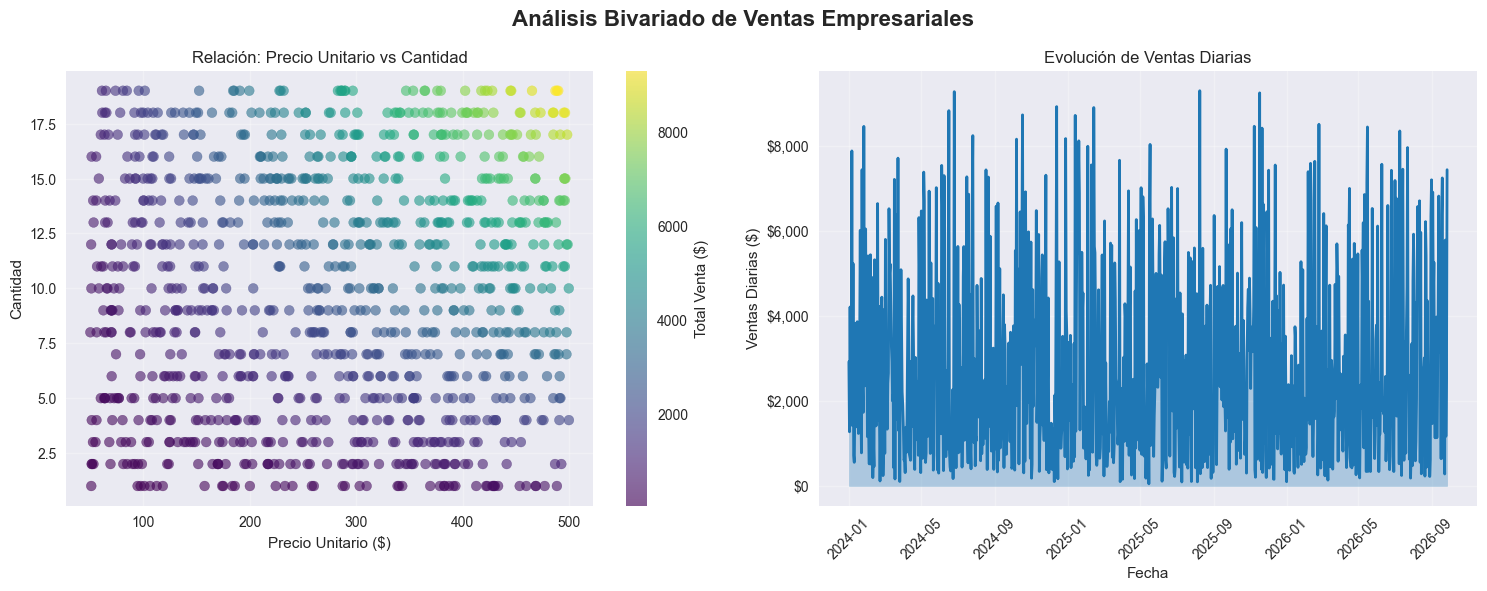

Análisis bivariado guardado correctamente


In [16]:
# Figura para análisis bivariado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Análisis Bivariado de Ventas Empresariales', fontsize=16, fontweight='bold')

# 1. Scatter: Precio unitario vs Cantidad
scatter = ax1.scatter(
    df['precio_unitario'],
    df['cantidad'],
    c=df['total_venta'],
    cmap='viridis',
    alpha=0.6,
    s=50
)

ax1.set_title('Relación: Precio Unitario vs Cantidad')
ax1.set_xlabel('Precio Unitario ($)')
ax1.set_ylabel('Cantidad')

cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Total Venta ($)')

# 2. Serie temporal: ventas diarias
ventas_diarias = df.groupby('fecha')['total_venta'].sum()

ax2.plot(
    ventas_diarias.index,
    ventas_diarias.values,
    color=colores[0],
    linewidth=2
)

ax2.fill_between(
    ventas_diarias.index,
    ventas_diarias.values,
    color=colores[0],
    alpha=0.3
)

ax2.set_title('Evolución de Ventas Diarias')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Ventas Diarias ($)')
ax2.tick_params(axis='x', rotation=45)

ax2.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('${x:,.0f}')
)

# Guardar y mostrar
plt.tight_layout()
plt.savefig('analisis_bivariado_empresarial.png', dpi=300, bbox_inches='tight')
plt.show()

print("Análisis bivariado guardado correctamente")

In [18]:
# ==============================
# EXPORTACIÓN A EXCEL PARA REPRODUCIBILIDAD
# ==============================

# Crear tablas agregadas para análisis
tabla_producto = (
    df.groupby('producto')
      .agg(
          ventas_totales=('total_venta', 'sum'),
          venta_promedio=('total_venta', 'mean'),
          cantidad_total=('cantidad', 'sum')
      )
      .reset_index()
)

tabla_region = (
    df.groupby('region')
      .agg(
          ventas_totales=('total_venta', 'sum'),
          transacciones=('total_venta', 'count')
      )
      .reset_index()
)

tabla_ventas_diarias = (
    df.groupby('fecha')['total_venta']
      .sum()
      .reset_index()
)

tabla_clientes = (
    df.groupby('cliente_tipo')
      .agg(
          ventas_totales=('total_venta', 'sum'),
          clientes=('cliente_tipo', 'count')
      )
      .reset_index()
)

# Exportar a Excel con múltiples hojas
archivo_excel = "dataset_y_tablas_dia2_analisis_visual.xlsx"

with pd.ExcelWriter(archivo_excel, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='dataset_completo', index=False)
    tabla_producto.to_excel(writer, sheet_name='ventas_por_producto', index=False)
    tabla_region.to_excel(writer, sheet_name='ventas_por_region', index=False)
    tabla_ventas_diarias.to_excel(writer, sheet_name='ventas_diarias', index=False)
    tabla_clientes.to_excel(writer, sheet_name='ventas_por_cliente', index=False)

print(f"Archivo Excel generado correctamente: {archivo_excel}")

Archivo Excel generado correctamente: dataset_y_tablas_dia2_analisis_visual.xlsx
